# OpenCV 101

Now that you're (hopefully) squared away on NumPy, we're gonna start dabbling in cameras.

We're gonna stick with using images given to us to learn the basics of computer vision, simply because when working with ROS you won't be interfacing directly with a camera -- rather it'll be an image topic. That being said, for your own learning, feel more than welcome to take this and do the added challenge of using a web cam as a capture source!

## What is an image?

As was mentioned in the NumPy 101 tutorial, an image is just a collection of numbers ranging from 0-255. More technically speaking, an image is an ordered array of arrays of integers ranging 0 to 255, aka a 2D array. Calling back to that NumPy example, lets take the image

```
[
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
]
```

as an example. It's just an array, containing arrays. The inner array represents a single pixel, with 3 integers representing the brightness of the individual colors red, green, and blue -- in that order (i.e. [red, green, blue]). Without going back to the previous tutorial, how many pixels are in this image? What colors are they?

Lets get our hands wet and take a look at it! We'll start by importing some libraries -- and you'll notice some new ones. Namely, ``cv2`` and ``matplotlib.pyplot``. The first, ``cv2``, is just the library for OpenCV. The latter is a graphing library, which in this we'll use to render images inline with our code. If you feel extra adventurous, go mess around with it -- it does way more than you'd think. I won't go in to how it's used here, if you're curious then you have a good googling exercise. 

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Now let's put our NumPy skills to use and create our hand-made image. Note the use of ``dtype=np.uint8`` -- as mentioned in the last tutorial, OpenCV expects arrays with integers of type ``uint8``.

In [16]:
image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
], dtype=np.uint8)

Now we'll render it, and as mentioned before don't worry as much about knowing how to do this part. There's a few steps included in it that won't make sense until later.

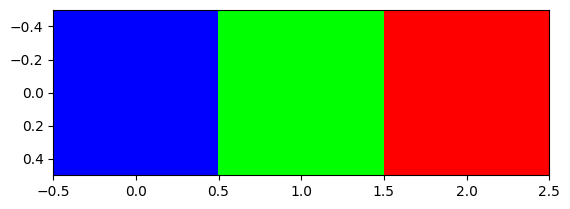

In [17]:
%matplotlib inline

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

So it's an image, but not quite what we thought? Remember we expected it to be red, then green, then blue. Well...

## Colorspaces.

Our human eyes see red, green, and blue. Thus, we often talk about colors (that aren't those three) as mixtures of those three. 99% of  the time in the real world, this set of options of colors does the trick. The problem is, there's a lot of *very* valuable information encoded in light that we end up missing out on if we only view light as combinations of red, green, and blue. Go ahead and check [this Wikipedia article](https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses) for more info on different color spaces, and pay extra attention to HSV and HSL/HLS.

Of course, the reason the colors showed up backwards doesn't have to do with some fancy weird color space. When OpenCV was first being developed, the standard color space the camera manufacturers went with was BGR -- blue, green, red. AKA, the reverse of what we thought we were in. Below, we're gonna take that and put it in RGB. 

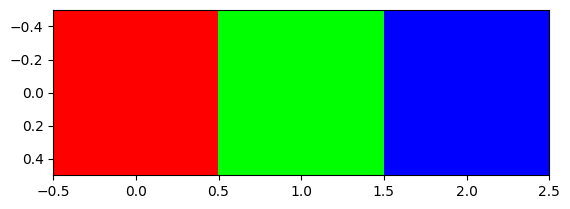

In [18]:
%matplotlib inline

# OpenCV Color conversions usually look like cv2.COLOR_[ORIGINAL]2[DESTINATION]
image_BGR = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.imshow(cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB))

And now it's how we expected! If you look at the code I told you not to look at, the image rendering code, you'll see it's actually taking our image we want to show and converting it from BGR to RGB. This is done because matplotlib expects an image that is in RGB. Yes -- had I not done that conversion the original step would've shown the image we expected it to, but only because there was an invisble conversion happening that doesn't happen anywhere else. Plus, things failing is a good way to learn.

Before we start messing with "real" images, we're going to do one more exercise to really drive home that images are just arrays and nothing more -- we're gonna generate a very messy image.

[[[ 33  78 218]
  [ 88 189 176]
  [136 153 236]
  ...
  [181  40 201]
  [254   7  69]
  [155 139 162]]

 [[160  20 236]
  [207  89 108]
  [ 21 153  54]
  ...
  [250  45 254]
  [153 103 228]
  [238 139 232]]

 [[199   9 195]
  [193 192 232]
  [ 33 158  77]
  ...
  [162 240 252]
  [101 128 250]
  [215  55  39]]

 ...

 [[ 96  33  31]
  [ 33 148 139]
  [216 107 132]
  ...
  [ 24 222  82]
  [ 73  61  91]
  [141 101 203]]

 [[ 22  44 146]
  [ 52 153 146]
  [221   6  27]
  ...
  [ 81   6  51]
  [ 48 179 185]
  [110  61  42]]

 [[121  85 222]
  [ 86  12 150]
  [227   1 225]
  ...
  [152 130 203]
  [175  23 213]
  [118  31  74]]]


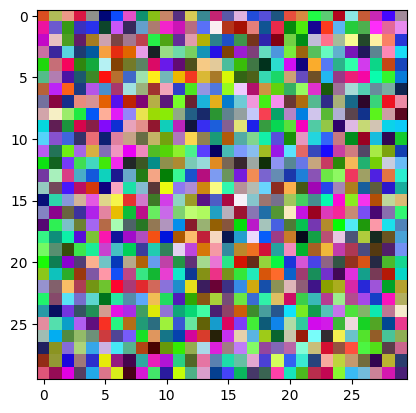

In [27]:
%matplotlib inline

messy_img = np.random.randint(0, 255, size=(30,30,3)).astype(np.uint8)

plt.imshow(cv2.cvtColor(messy_img, cv2.COLOR_BGR2RGB))

print(messy_img)

Run that as many times as you want, you'll keep getting a new image. 

Now lets move on to rendering an image file. You can do this with any image of your choosing, but for simplicity I've included an image called "blocks.jpeg" in ``pics/``. When loading the image, an important thing to note is that no matter what OS you're currently on (Windows, MacOS, or Linux), OpenCV always loads images with unix-style file paths -- meaning if you are currently working in some folder and your image "foo.jpg" is in a folder called "pics", then the **relative** path to the image is ``pics/foo.jpg``. Relative is in boldface there because that path is as it sounds -- relative to the working directory. If you move the python file to a different place, OpenCV will then look in another folder called "pics" contained inside that other place.

So, below we're loading an image and then the block after we show it.

In [20]:
image = cv2.imread("pics/blocks.jpeg")

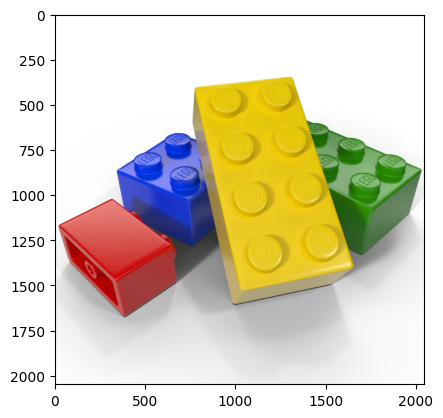

In [21]:
%matplotlib inline

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Now that we've succesfully grabbed the image, lets go ahead and grab some information about it! We're going to use NumPy's ``.shape`` to grab the image height, width, and depth. In this case, depth represents the number of color-channels in the image.

In [22]:
width, height, depth = image.shape
print(f"Width: {width}\nHeight: {height}\nDepth: {depth}")

Width: 2048
Height: 2048
Depth: 3


The final thing we're going to do in this tutorial is image slicing. For those that don't already know, Python lists/arrays can be "sliced", i.e. a new list can be created by 'cutting' parts of the original list. Those that do already know this can skip to the part where I say to stop skipping, because next we're going to show some basic slicing to make sure we understand the concept.

Syntax-wise, this is going to look like ``my_list[start:end]`` where ``my_list`` is the list to slice from, ``start`` is the index at which to start, and ``end`` is the index at which to stop. As you'll see, ``start`` is included and the interval and ``end`` is excluded. For those curious, this can be represented with interval notation, where the new list is given by [start, end). If you would like to slice the entire list up to a certain index, simply leave the start end of the slice blank, e.g. ``my_list[:end]``. Similarly, if you would like the rest of a list after (and including) a certain position, then simply give ``my_list[start:]``.

In [23]:
my_list = [0,1,2,3,4,5,6,7,8,9,10]
new_slice = my_list[2:8]
print(new_slice)

[2, 3, 4, 5, 6, 7]


This exact same concept applies to multidimensional arrays, you just have to give more information. In the following case, we have an array where each entry can be indexed as a row position and a column (often shortened to col) position. Thus, when indexing for slicing, you simply give ``my_array[row_start:row_end, column_start:column_end]``.

In [24]:
my_array = np.random.randint(0, 10, (5,5))
sliced_array = my_array[0:3, 0:3]

print(my_array)
print(sliced_array)

[[2 6 9 7 1]
 [3 1 0 4 6]
 [9 3 8 3 0]
 [5 3 2 1 4]
 [2 2 5 6 5]]
[[2 6 9]
 [3 1 0]
 [9 3 8]]


*(If you were skipping that go ahead and hop back in here)*

Since we're already well aware that images are just arrays of integers, we can slice an array that represents and image exactly the same as we'd slice any other array. This allows you to take specific chunks or strips of an image, rather than the whole image. Below I slice out just a square chunk of the image, but for an added challenge see if you can change it to chunk just the yellow block (with parts of the blue and green included, you'll learn how to handle that later).

In [25]:
sliced_image = image[500:1000, 500:1000]

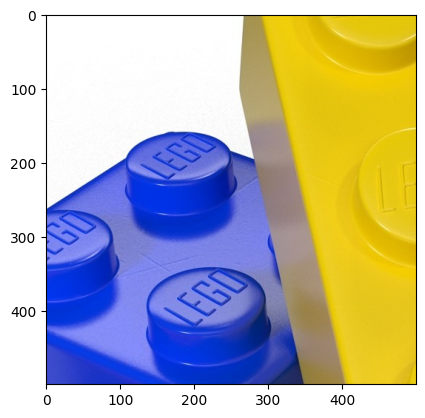

In [26]:
%matplotlib inline

plt.imshow(cv2.cvtColor(sliced_image, cv2.COLOR_BGR2RGB))

That does it for this tutorial. As we go on, it will become more and more necessary for you to branch out and try this stuff yourself, and try to learn some of it yourself too. It won't be long before we leave jupyter notebooks and venture into ROS.

As for other homework, try to take that supplied image (or your own image) and play with changing around its color-space! Or, now knowing that images are just arrays, and knowing that ``my_list[2, 2] = [x, y, z]`` sets the pixel at row 2 col 2 to ``[x, y, z]``, play around with changing the colors of random pixels! Maybe even mix that with slicing to do some really weird things to images... 